<a href="https://colab.research.google.com/github/Ssendags/Data-science-Project-2---Denis-Ssendagire/blob/main/Ssendagire_Denis_Project_2_First_Choice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset:**

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, etc.
It is a classification problem.

**Fields:**

The dataset contains 16 columns

-- Target field: Income

-- The income is divided into two classes: <=50K and >50K

-- Number of Rows: 48842

-- Number of attributes: 14
- These are the demographics and other features to describe a person
We can explore the possibility in predicting income level based on the individual’s personal information.
Acknowledgements
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html
The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html


**Attribute Information:**
1.	age: continuous.
2.	workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3.	fnlwgt: continuous.
4.	education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5.	education-num: continuous.
6.	marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7.	occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8.	relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9.	race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10.	sex: Female, Male.
11.	capital-gain: continuous.
12.	capital-loss: continuous.
13.	hours-per-week: continuous.
14.	native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
class: >50K, <=50K



**Foreseen Challenges:**

- Quite a lot of instances to consider
- Missing values represented as "?"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
filename = "/content/drive/MyDrive/Colab Notebooks/Adult Income.xlsx"
df = pd.read_excel(filename)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


No null values found in the dataset.

In [5]:
df.duplicated().sum()

52

In [6]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

Check for inconsistencies.

In [7]:
# Checking for Inconsistencies in categorical values. No inconsistencies found
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

It is noticed from return above that missing values are returned as "?"

In [8]:
# Replace all "?" values id dataframe with NaN.
import numpy as np
df = df.replace("?", np.NaN)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [12]:
# Impute missing data using mode.
mode_category_workclass = df['workclass'].mode()[0]
mode_category_occupation = df['occupation'].mode()[0]
mode_category_native = df['native-country'].mode()[0]
df['workclass'].fillna(mode_category_workclass, inplace=True)
df['occupation'].fillna(mode_category_occupation, inplace=True)
df['native-country'].fillna(mode_category_native, inplace=True)
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Identifying and correcting incosistencies for categorical data.

In [14]:
df['workclass'].value_counts()

Private             36655
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [15]:
df['education'].value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

In [16]:
df['marital-status'].value_counts()

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [17]:
df['relationship'].value_counts()

Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [18]:
df['race'].value_counts()

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [19]:
df['gender'].value_counts()

Male      32614
Female    16176
Name: gender, dtype: int64

In [20]:
df['native-country'].value_counts()

United-States                 44648
Mexico                          943
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [21]:
df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

All categorical values have been found with no incosistencies

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

Univariate visualisation of target (income) and all other features.

[Text(0.5, 0, 'index')]

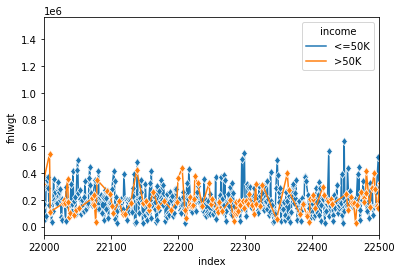

In [34]:
fig = sns.lineplot(x=df.index, y=df['fnlwgt'], markevery=1, marker='d', data=df, hue=df['income'])
plt.xlim(left=22000,right=22500)
# plt.ylim(bottom=0,top=1.5)
fig.set(xlabel = 'index')

[Text(0.5, 0, 'index')]

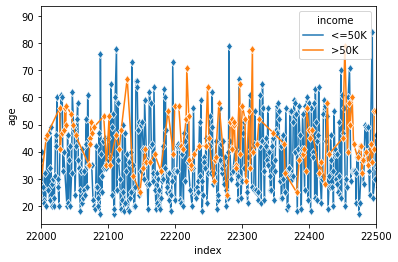

In [33]:
fig = sns.lineplot(x=df.index, y=df['age'], markevery=1, marker='d', data=df, hue=df['income'])
plt.xlim(left=22000,right=22500)
# plt.ylim(bottom=0,top=1.5)
fig.set(xlabel = 'index')